### Loading the Libraries and the Data

An investment firm is interested in investing in the Initial Public Offerings (IPO) in the Indian market. We are going to build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset we'll be using for this project contains information on past IPOs in the Indian market and comes from moneycontrol.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Indian_IPO_Market_Data.csv to Indian_IPO_Market_Data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Indian_IPO_Market_Data.csv')
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


Data set has 319 rows and 9 columns

In [4]:
#informatio about columns in the data set
df.info()

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


The `Listing_Gains_Percent` variable is the variable that will be used to create the target or outcome variable

In [5]:
# summary statistics for the Listing_Gains_Percent column

df['Listing_Gains_Percent'].describe()


,Listing_Gains_Percent
count,319.000000
mean,4.742696
std,47.650946
min,-97.150000
25%,-11.555000
50%,1.810000
75%,25.310000
max,270.400000


In [6]:
#summary statistics for all variables of the dataset

df.describe(include='all')


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Electronics Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


## Exploring the Data

In [7]:
#Listing_Gains_Percent target variable is continous. We will need to convert it into a categorical variable before we can proceed.

df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

df['Listing_Gains_Profit'].describe()

,Listing_Gains_Profit
count,319.000000
mean,0.545455
std,0.498712
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df.isnull().sum() # no missing values

,0
Date,0
IPOName,0
Issue_Size,0
Subscription_QIB,0
Subscription_HNI,0
Subscription_RII,0
Subscription_Total,0
Issue_Price,0
Listing_Gains_Percent,0
Listing_Gains_Profit,0


In [9]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

,proportion
Listing_Gains_Profit,
1,0.545455
0,0.454545


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
 9   Listing_Gains_Profit   319 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 25.1+ KB


In [11]:
#percentage of profitable IPOs
profitable_ipos = df[df['Listing_Gains_Profit'] > 0]
percentage_profitable = (len(profitable_ipos) / len(df)) * 100
percentage_profitable


54.54545454545454

In [12]:
#drop columns that are not needed
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.6 KB


Approximately 55% of the IPOs listed in profit, and the data is fairly balanced. We have also dropped some of the variables that might not carry predictive power

## Data Visualisation

We want to check for the distribution of predictors with respect to the target variable, since they could be informative for modeling

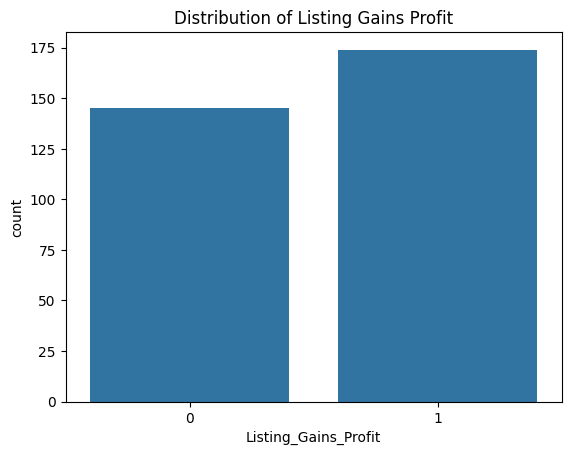

In [13]:
#Countplot to visualize the distribution of the target variable

sns.countplot(data=df, x='Listing_Gains_Profit')

# Set title
plt.title('Distribution of Listing Gains Profit')

# Show the plot
plt.show()


<Axes: >

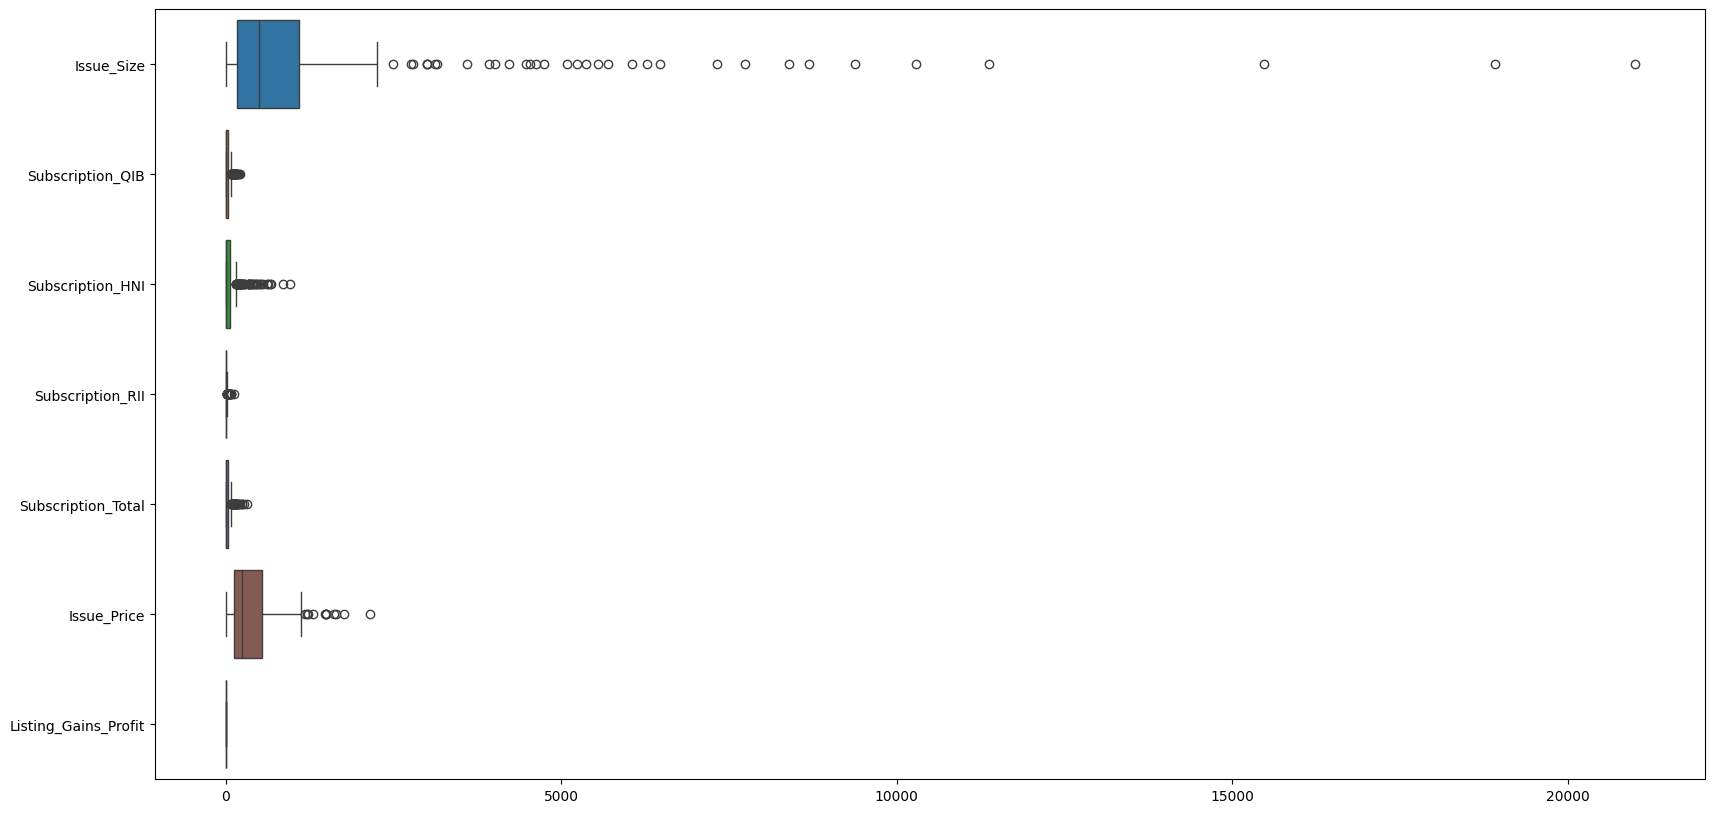

In [14]:
#check for presence of outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')



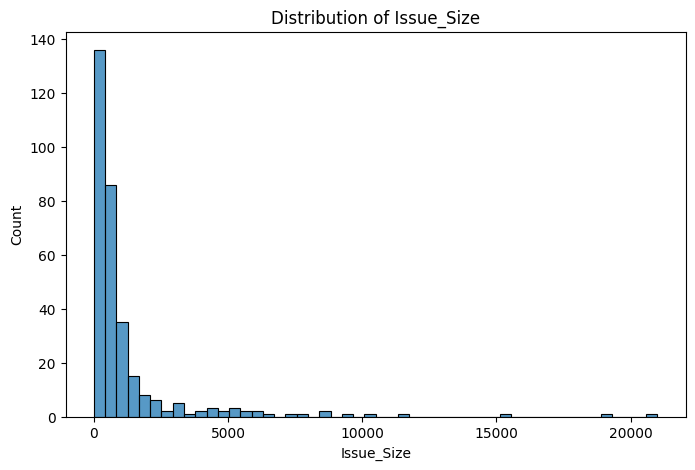

In [15]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

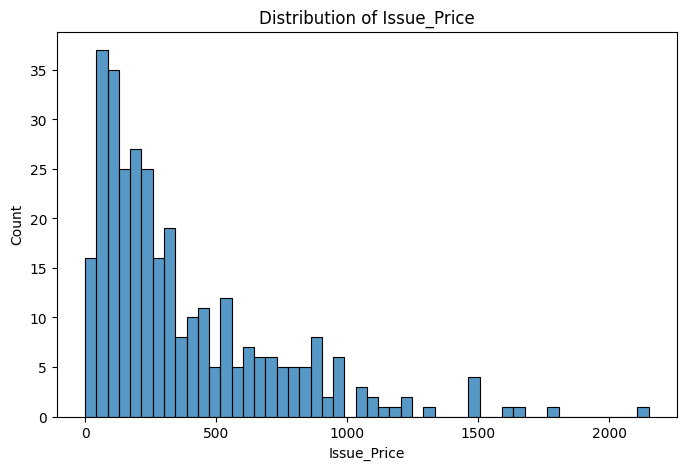

In [16]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

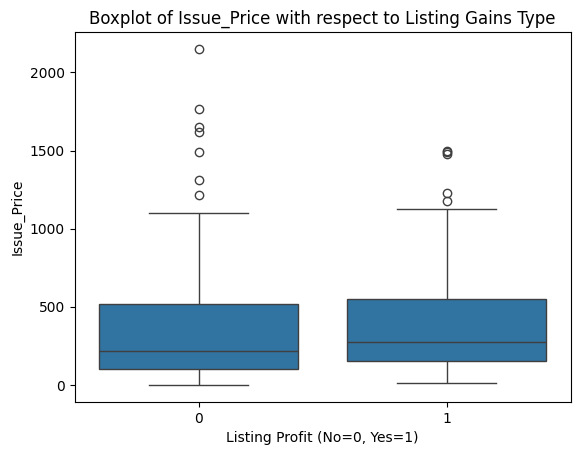

In [17]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

In [18]:
print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


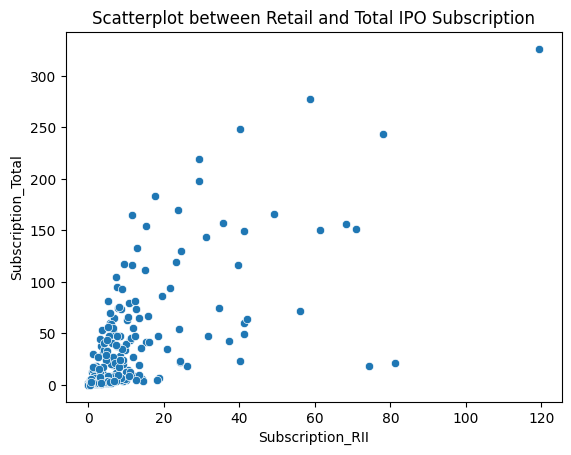

In [19]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

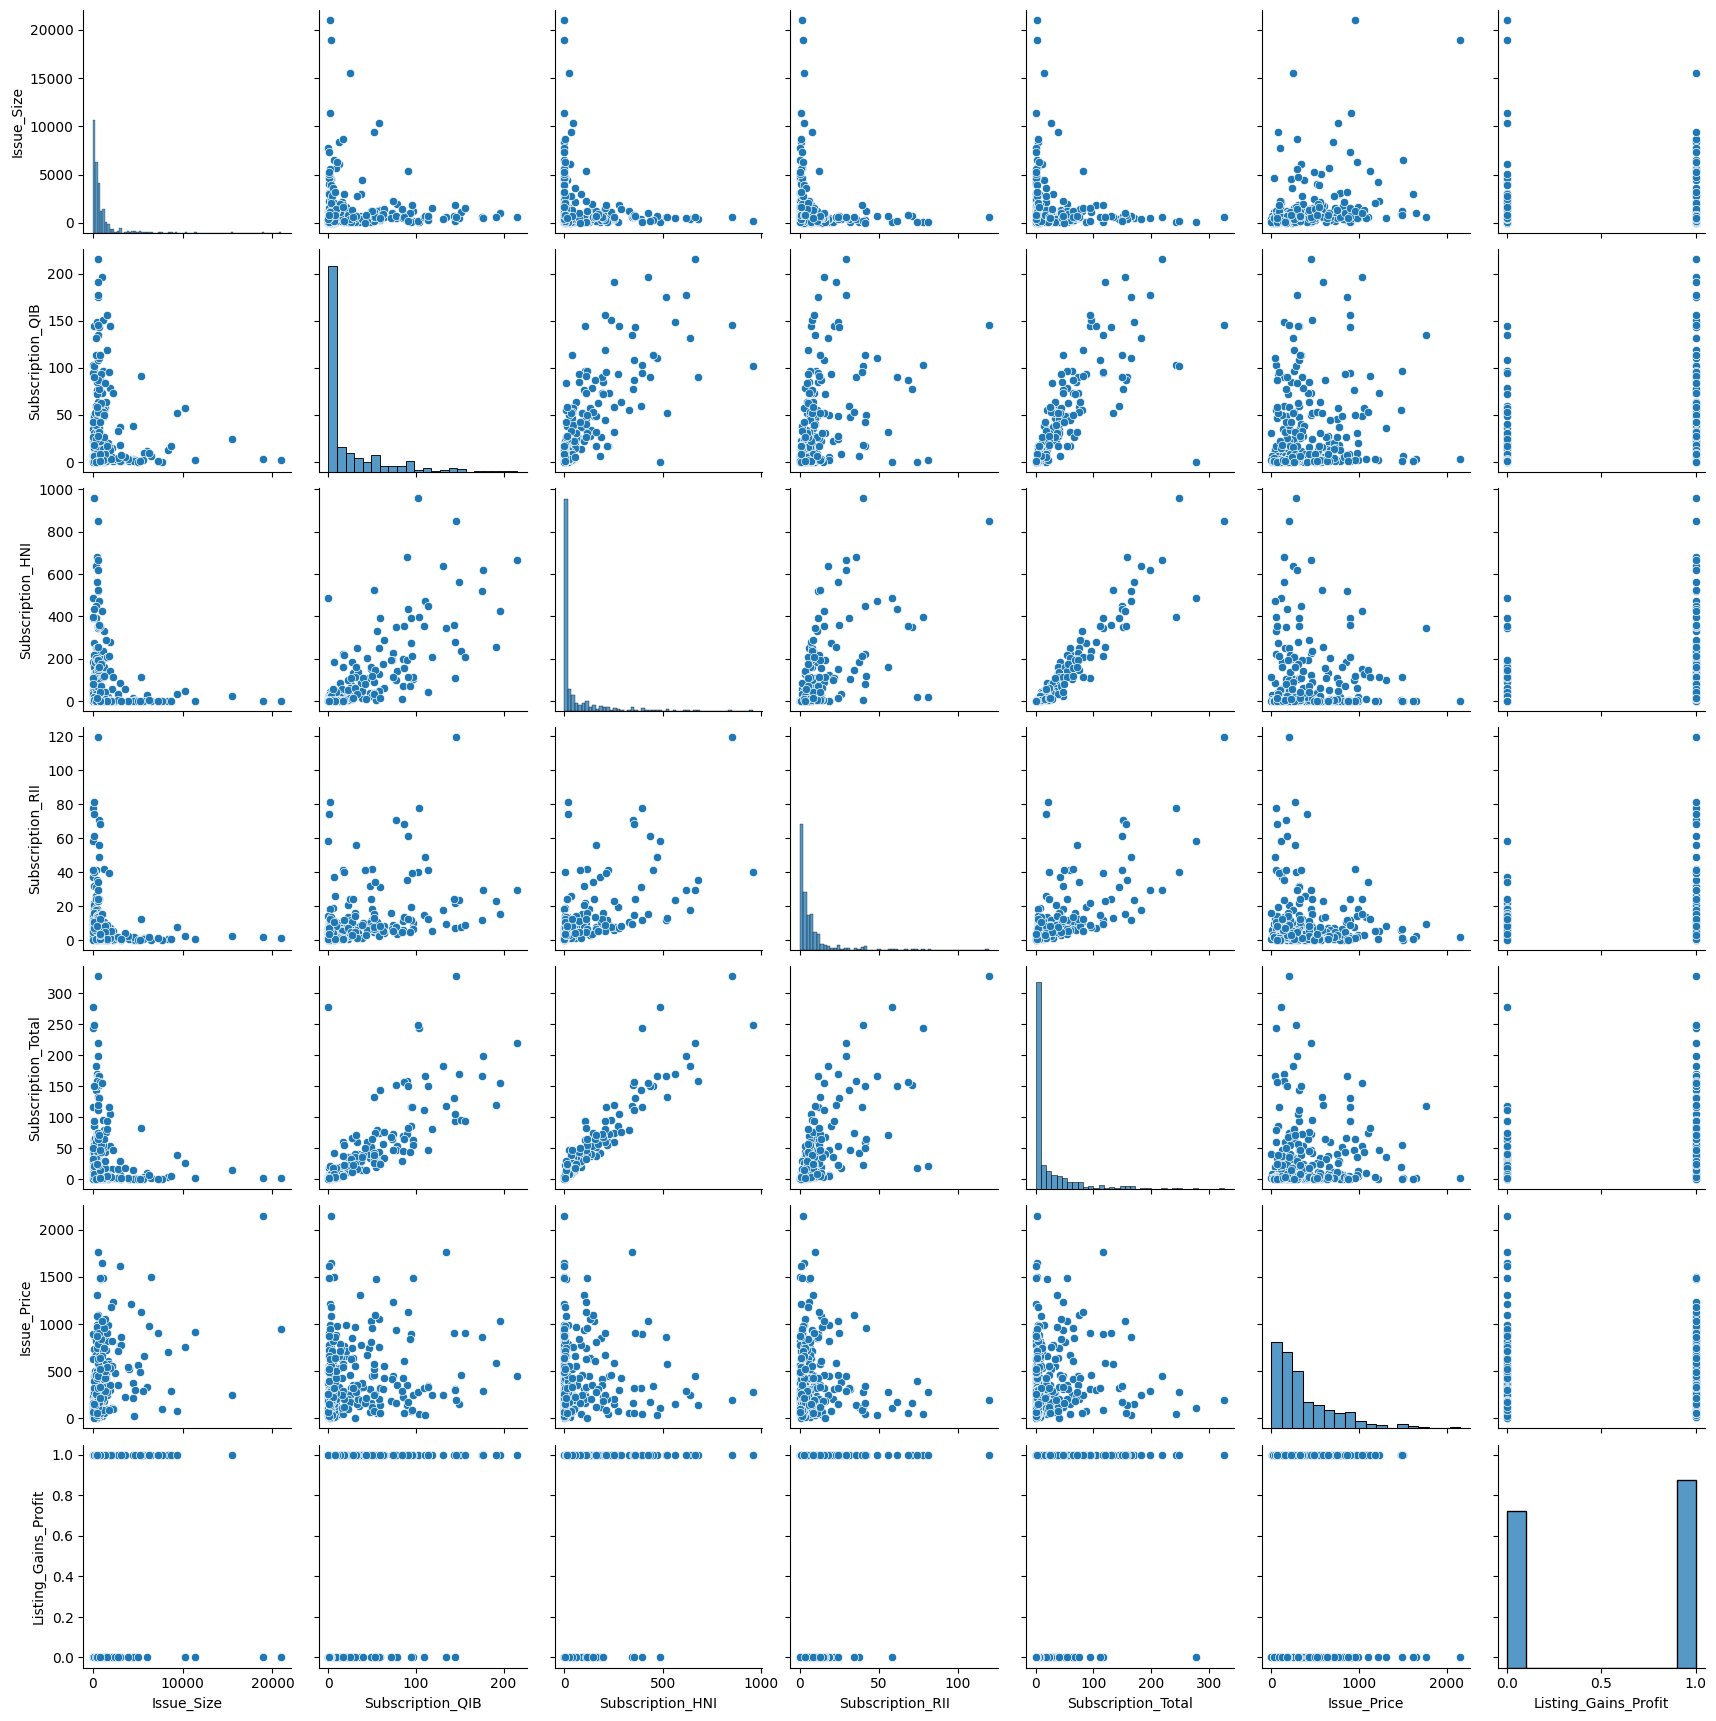

In [20]:
sns.pairplot(df) #pairplot to visualize the relationship between variables

Findings:

1. The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.

2. The boxplot of `Issue_Price`, with respect to `Listing_Gains_Profit`, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.

3. We also observed a correlation between Retail and Total IPO Subscription via a scatterplot.  


We will now treat the outliers using interquartile method by clipping the values at the upper and lower bounds

In [21]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [22]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

,Issue_Size
count,319.000000
mean,763.561238
std,769.689122
min,0.000000
25%,169.005000
50%,496.250000
75%,1100.000000
max,2496.492500


In [23]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [24]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

,Subscription_QIB
count,319.000000
mean,21.521183
std,29.104549
min,0.000000
25%,1.150000
50%,4.940000
75%,34.635000
max,84.862500


In [25]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [26]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

,Subscription_HNI
count,319.000000
mean,40.356426
std,57.427921
min,0.000000
25%,1.255000
50%,5.070000
75%,62.095000
max,153.355000


In [27]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [28]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

,Subscription_RII
count,319.000000
mean,6.060940
std,6.176882
min,0.000000
25%,1.275000
50%,3.420000
75%,8.605000
max,19.600000


In [29]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [30]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

,Subscription_Total
count,319.000000
mean,20.456646
std,27.217740
min,0.000000
25%,1.645000
50%,4.930000
75%,33.395000
max,81.020000


In [31]:
q1 = df['Listing_Gains_Profit'].quantile(q=0.25)
q3 = df['Listing_Gains_Profit'].quantile(q=0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 1.0
lower = -1.5
upper = 2.5


In [32]:
df['Listing_Gains_Profit'] = df['Listing_Gains_Profit'].clip(lower, upper)
df['Listing_Gains_Profit'].describe()

,Listing_Gains_Profit
count,319.000000
mean,0.545455
std,0.498712
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [33]:
print(df.skew())

Issue_Size              1.224620
Subscription_QIB        1.262734
Subscription_HNI        1.181636
Subscription_RII        1.129171
Subscription_Total      1.293880
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


## Setting the Target and Predictor Variables

In [34]:
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()


,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We have created an array of the target variable Listing_Gains_Profit
- We have crated an array of predictor variables (all excluding the target variable)
- We have performed normalisation to by scaling the predictors as this could affect the modelling process.


## Creating the Holdout Validation Approach

In [35]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 6)
(96, 6)


We will use the hold out validation approach to model evaluation. In this approach, we will divide the data in the 70:30 ratio, where we will use 70% of the data for training the model, while we will use the other 30% of the data to test the model

## Define the Deep Learning Classification Model

Now lets build the model. We will carry out the following steps

1. Instantiating the model
2. Adding the hidden layers
3. Selecting the activation functions

In [36]:
#Instantiate a model with the Keras Sequential API in TensorFlow.
tf.random.set_seed(100) #set seed for reproducibility
model = keras.Sequential()

#Add layers to the model
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model architecture is comprised of four hidden layers with `relu` as the activation function. The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model.

## Compile and Train the model

We will now compile and train the model using the following steps:

1. An optimizer
2. A loss function
3. An evaluation metric

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), #Adam optimizer with learning rate of 0.001
              loss=tf.keras.losses.BinaryCrossentropy(), #Binary Crossentropy loss function
              metrics=['accuracy']) #accuracy metric

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4738 - loss: 0.6965
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4675 - loss: 0.6936 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5480 - loss: 0.6920
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5413 - loss: 0.6917
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5604 - loss: 0.6914
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5482 - loss: 0.6908
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5358 - loss: 0.6901
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5397 - loss: 0.6892 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5397 - loss: 0.6879 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5397 - loss: 0.6864
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5504 - loss: 0.6841 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5504 - l

## Model Evaluation

You have defined, compiled, and fit your deep learning classification model to the training data. The next step is to evaluate your model's performance.

In [39]:
#Evaluate the model on the train set
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7256 - loss: 0.5499  


[0.542555570602417, 0.726457417011261]

In [40]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6823 - loss: 0.6557


[0.6577820777893066, 0.7083333134651184]

## Conclusion

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 75% on the training data and 69% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are a little off each other by 6%